In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
with open('likert.csv') as f:
    df = pd.read_csv(f)
f.close()

In [8]:
df.columns

Index(['Unnamed: 0', 'promotional_opportunities', 'performance_recognized',
       'feedback_offered', 'coaching_offered', 'mgmt_clear_mission',
       'mgmt_support_me', 'mgmt_support_team', 'mgmt_clear_comm',
       'direct_mgmt_satisfaction', 'job_stimulating', 'initiative_encouraged',
       'skill_variety', 'knowledge_variety', 'task_variety', 'fair_salary',
       'teamwork', 'team_support', 'team_comm', 'team_culture',
       'job_train_satisfaction', 'personal_train_satisfaction', 'org_culture',
       'grievances_resolution', 'co-worker_interaction',
       'workplace_conditions', 'job_stress', 'work/life_balance'],
      dtype='object')

In [6]:
len(df)

702

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['promotional_opportunities', 'performance_recognized',
       'feedback_offered', 'coaching_offered', 'mgmt_clear_mission',
       'mgmt_support_me', 'mgmt_support_team', 'mgmt_clear_comm',
       'direct_mgmt_satisfaction', 'job_stimulating', 'initiative_encouraged',
       'skill_variety', 'knowledge_variety', 'task_variety', 'fair_salary',
       'teamwork', 'team_support', 'team_comm', 'team_culture',
       'job_train_satisfaction', 'personal_train_satisfaction', 'org_culture',
       'grievances_resolution', 'co-worker_interaction',
       'workplace_conditions', 'job_stress', 'work/life_balance'],
      dtype='object')

## Hypothesized Latent Factors
1. **Employee Valued:** promotional opportunities, performance recognized, feedback offered, coaching offered
2. **Management Satisfaction:** mgmt clear mission, mgmt support me, mgmt support team, mgmt clear comm, direct mgmt satisfaction
3. **Job Satisfaction:** job stimulating, initiative encouraged, skill variety, knowledge variety, task variety
4. **Team Satisfaction:** teamwork, team support, team comm, team culture
5. **Training Satisfaction:** job training satisfaction, personal training satisfaction
6. **Organizational Conditions:** org culture, grievances resolution, co-worker interaction, workplace conditions
7. **Work/Life Balance:** job stress, work/life balance  

## Correlations
Highlighted are the correlations of items which are hypothesized to form an latent factor.  The correlations within these regions should be relatively high (0.5 to 0.7) as that would signify the items are measuring a similar but slightly unique constructs (ie. sub-constructs of one latent factor).  However, if the correlations are too large (ie. 0.7+) that would signify the items might be measuring very similar or even the same constructs.  Those items should be rewritten.

<Figure size 1800x1080 with 0 Axes>

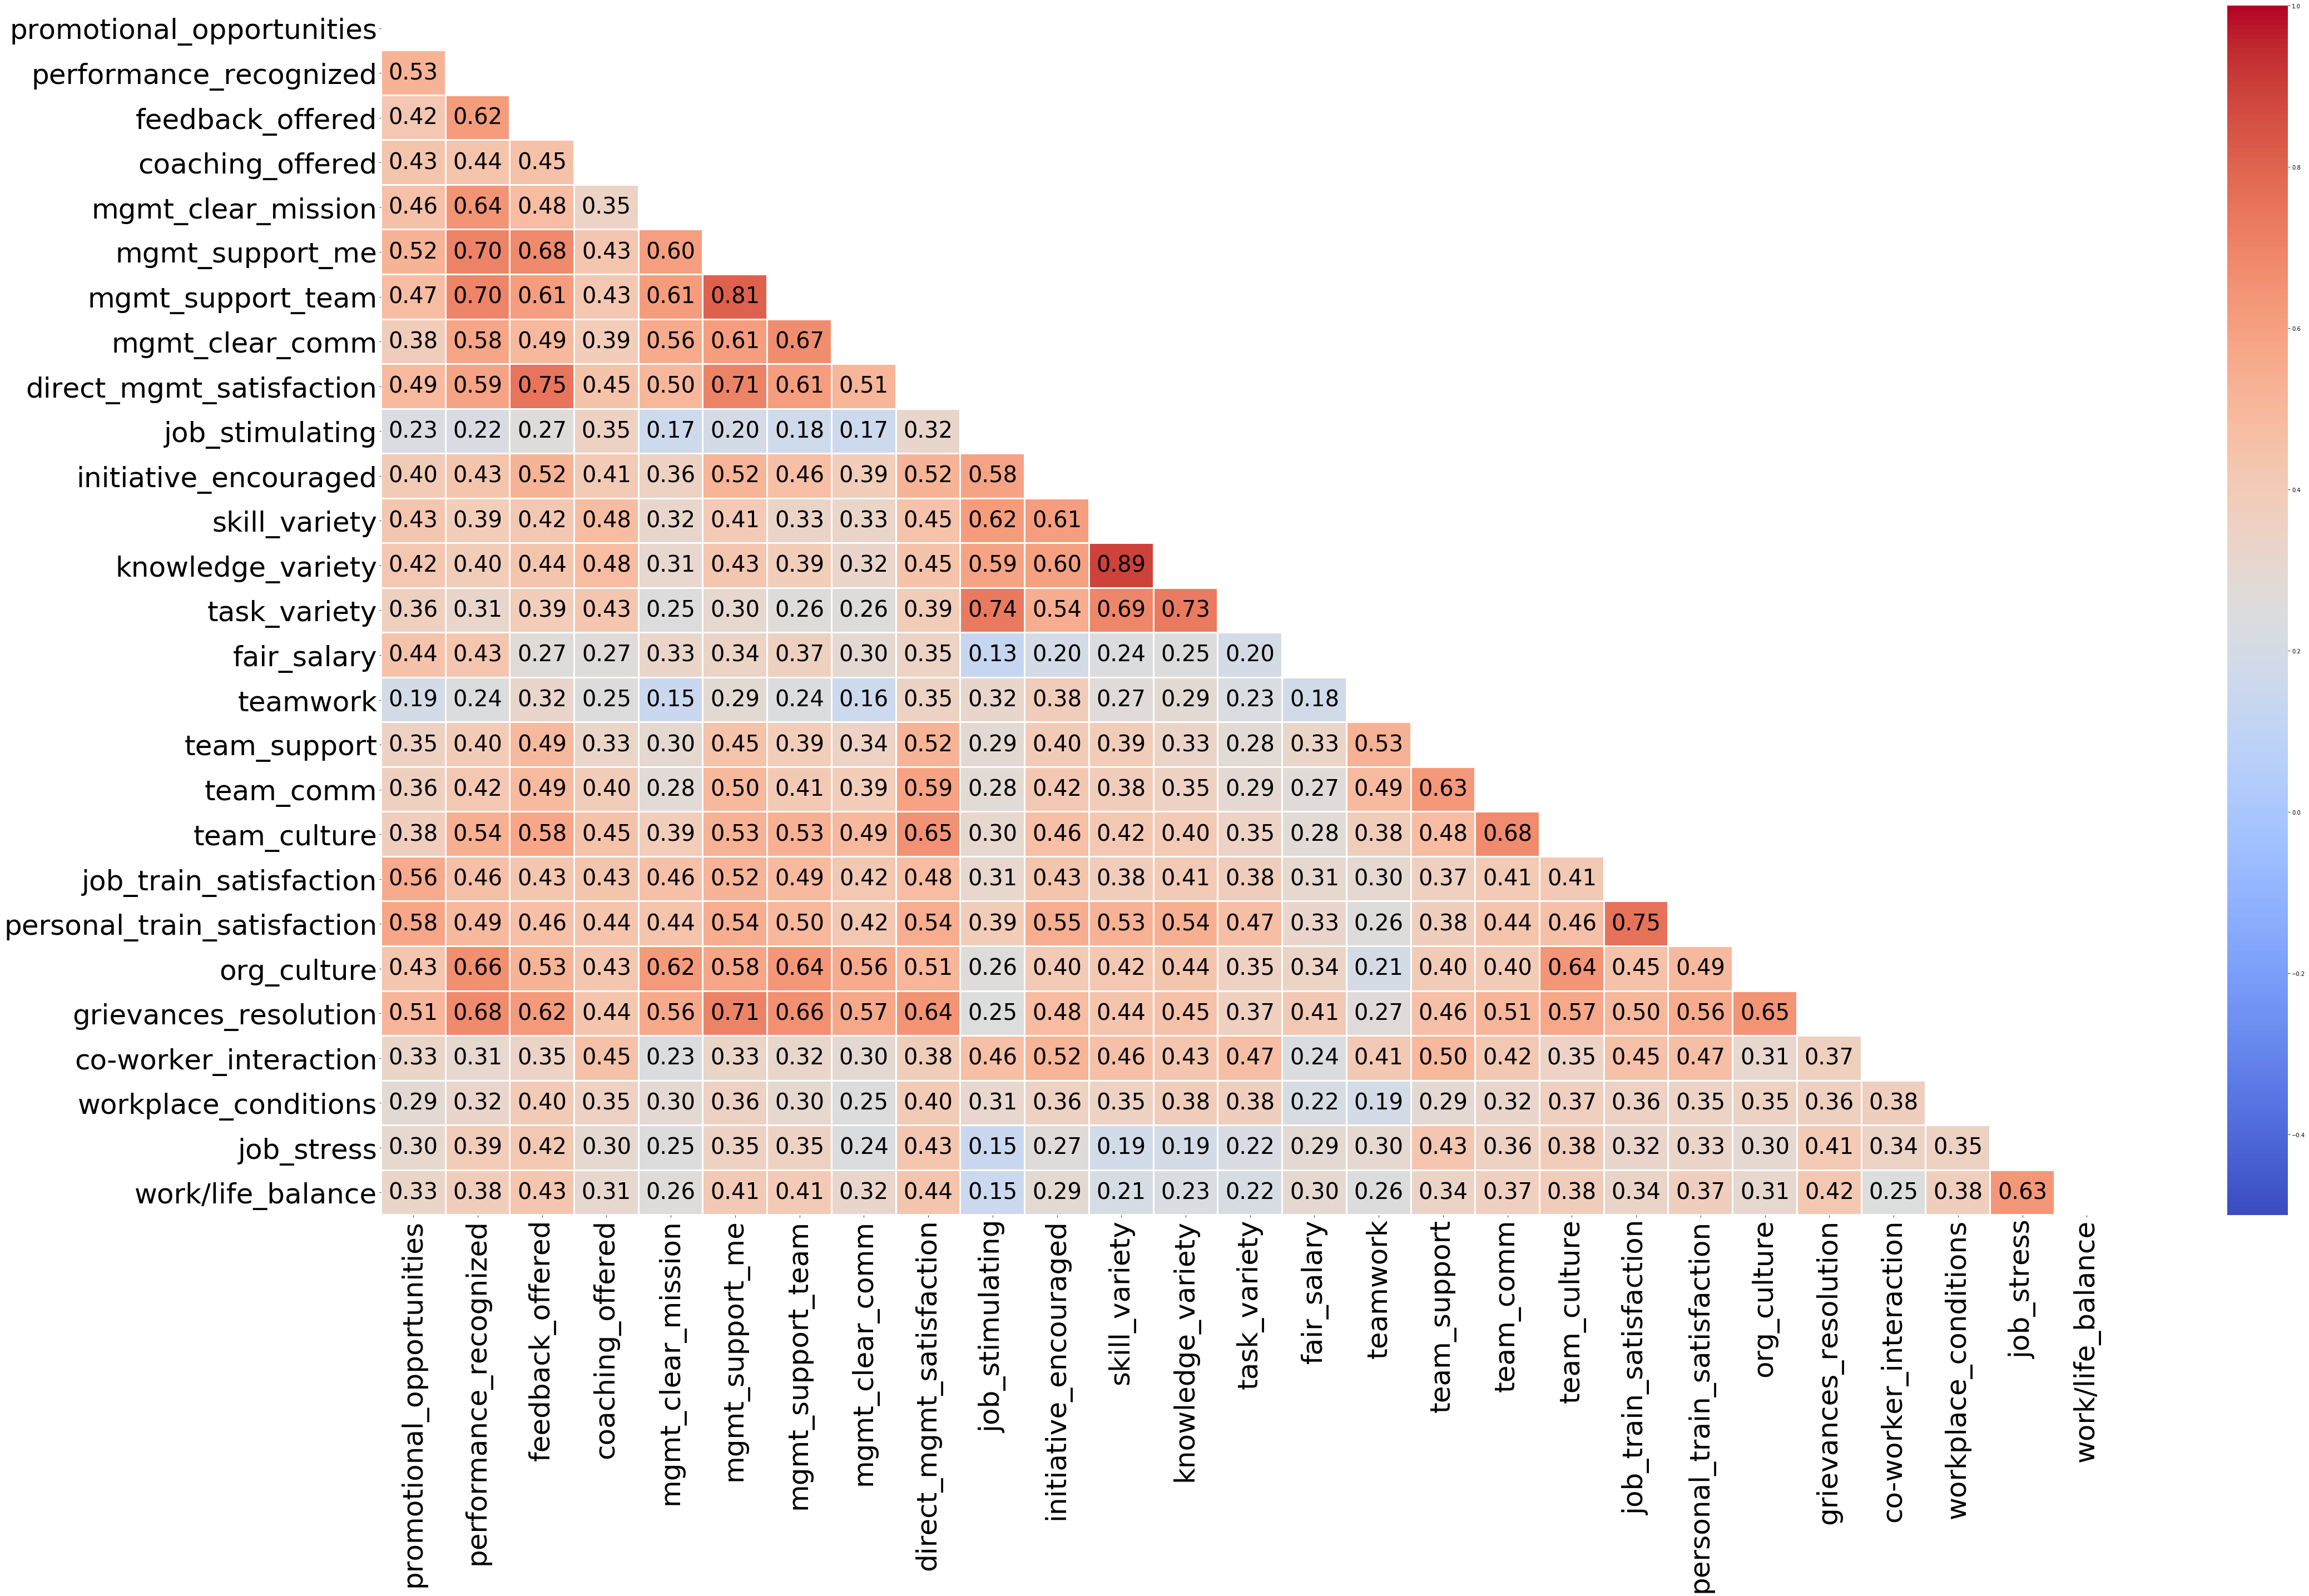

In [11]:
likert_corr = df.corr()

plt.figure(figsize=(25,15))
mask = np.zeros_like(likert_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(70,40))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
sns.heatmap(likert_corr, cmap='coolwarm', annot=True,
            fmt=".2f", annot_kws={'size': 40, 'color': 'black'}, linewidths=2,
            vmin=-0.5, mask=mask)

## Cronbach's Alpha
- Cronbach's Alpha is a survey's measure of reliability.  As mentioned above, surveys are developed using studied models (ie. The Big5 personality model) and the individual questions are developed to assess each component of the model. If the items were written correctly in terms of statistical rigor (ie. construct validity and reliability) the questions should covary together and therefore, have high (0.8+) alpha reliability.  Questions which assess different components of the model should have low alpha reliability.   

In [15]:
# Here are the hypothesed factors and we would expect alpha to be high for each set of questions
likert_items = df[['promotional_opportunities', 'performance_recognized',
       'feedback_offered', 'coaching_offered', 'mgmt_clear_mission',
       'mgmt_support_me', 'mgmt_support_team', 'mgmt_clear_comm',
       'direct_mgmt_satisfaction', 'job_stimulating', 'initiative_encouraged',
       'skill_variety', 'knowledge_variety', 'task_variety', 'fair_salary',
       'teamwork', 'team_support', 'team_comm', 'team_culture',
       'job_train_satisfaction', 'personal_train_satisfaction', 'org_culture',
       'grievances_resolution', 'co-worker_interaction',
       'workplace_conditions', 'job_stress', 'work/life_balance']]

employee_valued = df[['promotional_opportunities','performance_recognized',
                            'feedback_offered','coaching_offered']]

mgmt_sati = df[['mgmt_clear_mission','mgmt_support_me',
                                      'mgmt_support_team','mgmt_clear_comm',
                                      'direct_mgmt_satisfaction']]

job_satisfaction = df[['job_stimulating','initiative_encouraged',
                                     'skill_variety','knowledge_variety',
                                     'task_variety']]

team_satisfaction = df[['teamwork','team_support',
                                      'team_comm','team_culture']]

training_satisfaction = df[['job_train_satisfaction',
                                          'personal_train_satisfaction']]

org_environment = df[['org_culture','grievances_resolution',
                                  'co-worker_interaction','workplace_conditions']]

work_life_balance = df[['job_stress','work/life_balance']]

salary_satisfaction = df[['fair_salary']]

In [13]:
dict = {'employee_valued': employee_valued, 'mgmt_sati': mgmt_sati,
        'job_satisfaction': job_satisfaction,
        'team_satisfaction': team_satisfaction,
        'training_satisfaction': training_satisfaction,
        'org_environment': org_environment,
        'work_life_balance': work_life_balance}

for i in dict:
    print('{} Alpha: {}'.format(i, pg.cronbach_alpha(data=dict[i], nan_policy='listwise')))

employee_valued Alpha: (0.7917055111633278, array([0.765, 0.816]))
mgmt_sati Alpha: (0.8894615536716981, array([0.876, 0.902]))
job_satisfaction Alpha: (0.907080891024365, array([0.896, 0.918]))
team_satisfaction Alpha: (0.8096301285685945, array([0.786, 0.832]))
training_satisfaction Alpha: (0.859875500828595, array([0.837, 0.879]))
org_environment Alpha: (0.7318459419728576, array([0.698, 0.763]))
work_life_balance Alpha: (0.7746285100921855, array([0.739, 0.806]))


The alpha reliabilities for most hypothesized factors is high.  Org_condition and Work_life_balance do have lower alpha reliability signifying the items might not be entirely measuring the same construct. The alpha coefficients fall within their confidence intervals means the results are significant (p<0.05)

## Factor Analysis
A factor analysis or more specifically a **exploratory factor analysis (EFA)** has been traditionally utilized to explore the structure of observed features.  In other words, given a dataset we can apply an EFA to determine if any latent features or factors might exist.  An EFA is often used in the development of assessments and it is an essential tool to help confirm the underlying constructs the assessment is meant to measure.  An EFA can be used to help confirm hypothesized factors as we have in our case.  

- Before we can perform a factor analysis we need to perform Bartlett's test of sphericity to determine whether or not our data actually contains features correlated enough from which latent (hidden) factors can be identified.  We p-value needs to be significant (ie. p<0.05). 

A **confirmatory factor analysis (CFA)** was specifically developed to test the research hypothesis of the underlying factors.  It allows us to  

In [17]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, float(p_value)

(nan, nan)

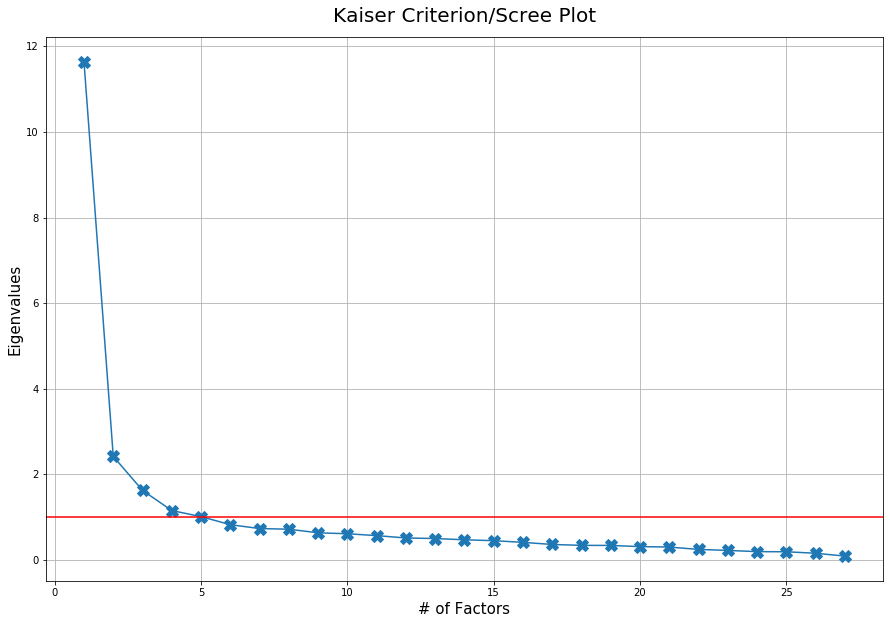

In [18]:
factor = FactorAnalyzer()
factor.fit(likert_items)

ev, v = factor.get_eigenvalues()
plt.figure(figsize=(15,10))
plt.plot(range(1, likert_items.shape[1]+1), ev, marker='X', markersize=12)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('# of Factors', fontsize=15)
plt.ylabel('Eigenvalues', fontsize=15)
plt.title('Kaiser Criterion/Scree Plot', fontsize=20, pad=15)
plt.grid()
plt.show()

The eigenvalue "elbow plot" is often used to determine the number of factors present in the dataset. We typically want to select the number of factors right before the line begins to flatten out.  In our case it seems 4 or 5 is the optimal number of factors.  That said, let's first validate the hypothesized 7 factors. 

In [20]:
factor = FactorAnalyzer(8, rotation='promax', method='ml', impute='mean', use_smc=False)
factor.fit(df)
factors = factor.loadings_
factors_df = pd.DataFrame(factors, columns=['factor1', 'factor2', 'factor3','factors4',
                                           'factor5', 'factor6', 'factor7', 'factor8'],
                        index=df.columns)

In [21]:
factors_df.style.bar(subset=['factor1', 'factor2', 'factor3',
                    'factors4','factor5', 'factor6', 'factor7', 'factor8'], color='green')

,factor1,factor2,factor3,factors4,factor5,factor6,factor7,factor8
promotional_opportunities,0.237503,0.007111,0.450343,-0.016711,0.028232,-0.056175,0.095320,-0.016915
performance_recognized,0.883252,0.017865,-0.088306,-0.028027,0.063631,0.001387,-0.034667,-0.031924
feedback_offered,0.502484,0.075451,-0.128135,0.102360,0.164775,0.016168,0.018890,0.273707
coaching_offered,0.150867,0.252045,0.129676,0.006045,0.081151,0.091781,0.056772,-0.029914
mgmt_clear_mission,0.950173,-0.005521,0.045869,-0.087710,-0.098047,-0.084615,-0.080067,-0.093156
mgmt_support_me,0.847402,-0.068320,0.048513,0.028868,-0.060863,-0.155320,0.049523,0.383841
mgmt_support_team,0.925860,-0.063009,-0.028911,-0.069693,-0.009326,-0.045901,-0.008528,0.188118
mgmt_clear_comm,0.779454,-0.037770,0.002523,-0.003227,-0.121490,0.061089,-0.032740,0.042579
direct_mgmt_satisfaction,0.376850,0.022175,0.035188,0.141234,0.109823,0.120401,-0.000407,0.291448
job_stimulating,0.007334,0.978059,-0.076133,0.032063,-0.068323,-0.011476,-0.356863,0.002474


In [22]:
factor = FactorAnalyzer(5)
factor.fit(df)
factors = factor.loadings_
factors_df = pd.DataFrame(factors, columns=['factor1', 'factor2', 'factor3','factors4',
                                           'factor5'],
                        index=df.columns)

In [23]:
model_dict = {'valued_employee': ['promotional_opportunities','performance_recognized',
                                  'feedback_offered','coaching_offered'],
             'mgmt_sati': ['mgmt_clear_mission','mgmt_support_me','mgmt_support_team',
                           'mgmt_clear_comm','direct_mgmt_satisfaction'],
             'job_satisfaction': ['job_stimulating','initiative_encouraged',
                                  'skill_variety','knowledge_variety','task_variety'],
             'salary_satisfaction': ['salary_satisfaction'],
             'team_satisfaction': ['teamwork','team_support','team_comm','team_culture'],
             'training_satisfaction': ['job_train_satisfaction',
                                       'personal_train_satisfaction'],
             'org_condition': ['org_culture','grievances_resolution',
                               'co-worker_interaction','workplace_conditions'],
             'work_life_balance': ['job_stress','work/life_balance']
             }

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(
    df, model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

cfa.fit(df)

cfa.loadings_

array([[0.67403378, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.88007061, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.8666713 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.63106144, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.7300727 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.94956242, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.89962223, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.78421651, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.83253659, 0.        , 0.        , 0.        ,
        0.        , 0.      

In [24]:
cfa_factors_df = pd.DataFrame(cfa.loadings_, columns=['factor1', 'factor2', 'factor3','factors4',
                                           'factor5', 'factor6', 'factor7', 'factor8'],
                        index=df.columns)
cfa_factors_df

,factor1,factor2,factor3,factors4,factor5,factor6,factor7,factor8
promotional_opportunities,0.674034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
performance_recognized,0.880071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
feedback_offered,0.866671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
coaching_offered,0.631061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_clear_mission,0.000000,0.730073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_support_me,0.000000,0.949562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_support_team,0.000000,0.899622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_clear_comm,0.000000,0.784217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
direct_mgmt_satisfaction,0.000000,0.832537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
job_stimulating,0.000000,0.000000,0.609247,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
cfa_factors_df.style.bar(subset=['factor1', 'factor2', 'factor3',
                    'factors4','factor5', 'factor6', 'factor7', 'factor8'], color='orange')

,factor1,factor2,factor3,factors4,factor5,factor6,factor7,factor8
promotional_opportunities,0.674034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
performance_recognized,0.880071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
feedback_offered,0.866671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
coaching_offered,0.631061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_clear_mission,0.000000,0.730073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_support_me,0.000000,0.949562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_support_team,0.000000,0.899622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mgmt_clear_comm,0.000000,0.784217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
direct_mgmt_satisfaction,0.000000,0.832537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
job_stimulating,0.000000,0.000000,0.609247,0.000000,0.000000,0.000000,0.000000,0.000000
